A.0.1.1 Per type (Standard Tournament)
-----------

For a given set of players four different type of tournaments have been performed, standard, noisy, probabilistic ending, noisy and probabilistic ending. Because in our experiment computer seed have been used the four tournaments for each seed share same parameters.

The same notation as in Section I will be used. Furthermore, here we define the highest cooperation rating in tournament $C^{*}_{r}$, the lowest cooperation rating in tournament  $\tilde{C_{r}}$, the normalised rank of highest cooperator $\bar{r_{C}}$, the normalised rank of lowest cooperator $\bar{r_{D}}$, 
the mean cooperation rating $\bar{C_{r}}$ and the median $\breve{C_{r}}$.

Each tournament type.

In [10]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import tools

%matplotlib inline

In [11]:
import itertools

In [3]:
font = {'weight': 'bold',
        'size'   : 10}
matplotlib.rc('font', **font)

The structure of the analysis will be similar for all tournament types. More specifically we are looking at V sections of analysis. These include:

- I. the performance of the highest cooperator
    - what was the rank of the person with the $C^{*}_{r}$
- II. the performance of the lowest cooperator
    - what was the rank of the person with the $\tilde{C_{r}}$
- III. study the cooperating ratio of the winner $C_{W}$
    - against the ${C^{*}}_{r}$
    - against the $\tilde{C_{r}}$
    - against the $\bar{C_{r}}$
    - against the $\breve{C_{r}}$
- IV. study the cooperating ratio of the looser $C_{L}$
    - against the ${C^{*}}_{r}$
    - against the $\tilde{C_{r}}$
    - against the $\bar{C_{r}}$
    - against the $\breve{C_{r}}$
- V. the r distribution
    - the number of winners that cooperated more than the $r$ times of: 
        - ${C^{*}}_{r}$
        - $\tilde{C_{r}}$
        - $\bar{C_{r}}$
        - $\breve{C_{r}}$


Standard
--------

In [4]:
df = pd.read_csv('data/df.csv')

In [5]:
df = pd.read_csv('../data/main.csv')

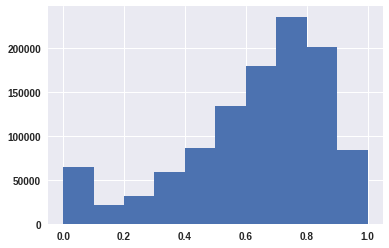

In [32]:
plt.hist(standar_tournaments['Cooperation_rating']);

In [7]:
winners = standar_tournaments[standar_tournaments['Rank'] == 0]

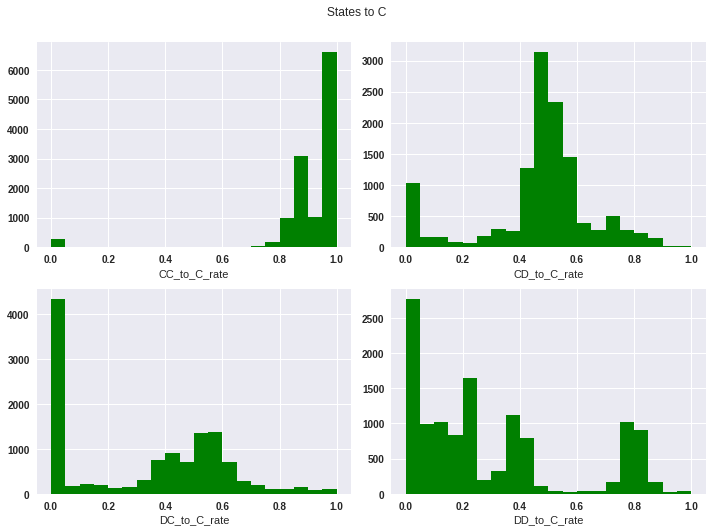

In [8]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.suptitle('States to C', y=1.05)

for index, label in zip(itertools.product((0, 1), repeat=2),
                        ['CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate']):
    axes[index[0]][index[1]].hist(winners[label], bins=20, color='green'); 
    axes[index[0]][index[1]].set_xlabel(label)

plt.tight_layout()
plt.show()

In [9]:
losers = standar_tournaments.loc[standar_tournaments.groupby(['seed'], sort=False)['Rank'].idxmax()]

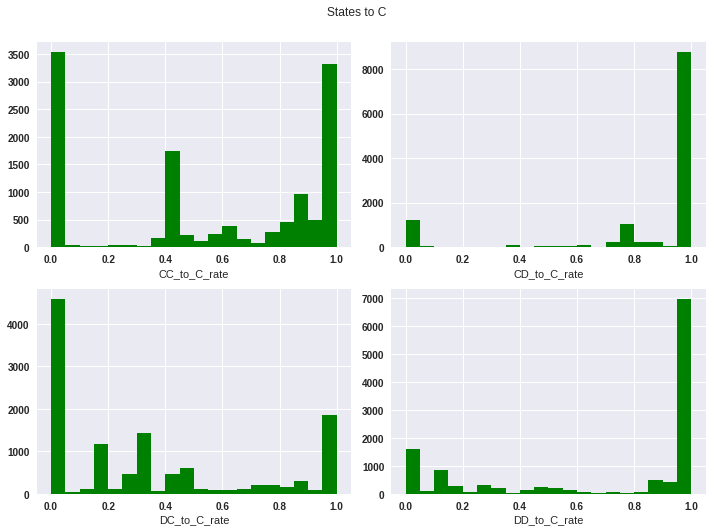

In [10]:
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 7))
fig.suptitle('States to C', y=1.05)

for index, label in zip(itertools.product((0, 1), repeat=2),
                        ['CC_to_C_rate', 'CD_to_C_rate', 'DC_to_C_rate', 'DD_to_C_rate']):
    axes[index[0]][index[1]].hist(losers[label], bins=20, color='green'); 
    axes[index[0]][index[1]].set_xlabel(label)

plt.tight_layout()
plt.show()

**V. $r$ distribution**

What is the $r-$ distribution?

The $r-$ distribution is plotting the number of times the winner had a $C_{W}$ greater than the $r \times x$.

for $x$ is $C^{*}, \tilde{C}, \bar{C}, \breve{C}$

The following plot is showing the following:
    
- The winner always had greater $C$ than the most defector
- In a standard tournament you would want to be just a bit more cooperative than the half $C$ of the $C^{*}$
- when you are just a bit less cooperative ($\simeq 0.8$) than the mean/median $C$. 

In [11]:
df, name = pd.read_csv('data/standar_tournaments.csv'), 'standar'

/home/nightwing/anaconda3/envs/axlml/lib/python3.5/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The set_color_cycle attribute was deprecated in version 1.5. Use set_prop_cycle instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


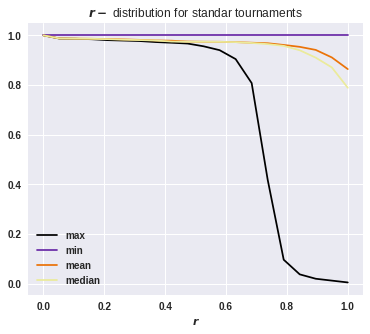

In [12]:
tools.r_distribution(df['winner coop'], df['max coop'], df['min coop'], df['mean coop'], 
                     df['median coop'], title='$r-$ distribution for {} tournaments'.format(name))

In [13]:
df.head()

,index,loser coop,max coop,mean coop,median coop,min coop,norm rank C,norm rank D,size,std,winner coop
0,0,0.127888,0.966144,0.606280,0.664537,0.0,0.96,0.98,101.0,0.231187,0.704614
1,1,0.130476,0.958818,0.611329,0.668934,0.0,0.95,0.96,101.0,0.230437,0.710911
2,2,0.689007,0.944620,0.633668,0.697233,0.0,0.55,0.88,101.0,0.228257,0.738429
3,3,0.853175,0.973206,0.658474,0.737143,0.0,0.70,0.86,101.0,0.228943,0.775587
4,4,0.135645,0.945836,0.620308,0.677626,0.0,0.98,0.93,101.0,0.229056,0.719308


In [14]:
len(df)

12287